**Note**:

- This chapter implements method of least squares from scratch
- Loss function = mean squared error
- _2 examples had been provided:_
    * Calculating slope only (i.e. weight)
    * Calculating slope and itercept (i.e. weight and bias)

In [14]:
# print(plt.style.available)

### Calculating slope only (i.e. weight)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("pizza.txt",sep="\s+")

In [4]:
data.head()

,Reservations,Pizzas
0,13,33
1,2,16
2,14,32
3,23,51
4,13,27


In [5]:
X = data["Reservations"]
y = data["Pizzas"]

Text(0.5, 1.0, 'Scatterplot displaying Reservations vs Pizzas')

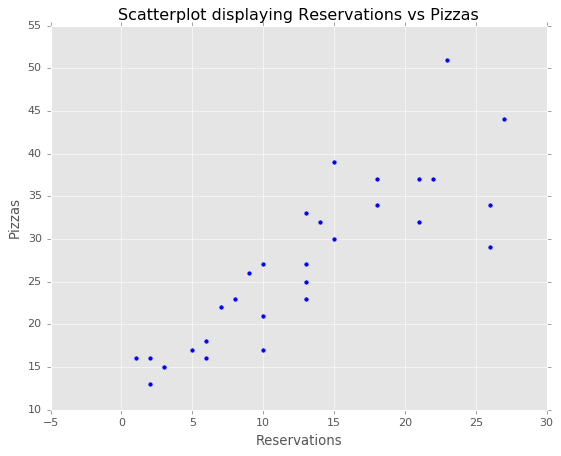

In [25]:
plt.style.use('ggplot')
plt.scatter(X,y)
plt.xlabel("Reservations")
plt.ylabel("Pizzas")
plt.title("Scatterplot displaying Reservations vs Pizzas")

In [26]:
def predict(X,w):
    return (X*w)

def loss(X,y,w):
    pred_out = np.average((y - predict(X,w)) ** 2)
    #print(pred_out)
    return pred_out
    
    

In [30]:
def train(X,y,iterations = 10000, lr=0.01):
    w = 0 
    lst_wt = []
    lst_loss = []
    for cnt in range(iterations):
        cur_loss = loss(X,y,w)
        lst_wt.append(w)
        lst_loss.append(cur_loss)
        #print(f"Iteration:{cnt +1} weight value:{w} current loss:{cur_loss}")
        
        if loss(X,y,w+lr) < cur_loss:
            w +=lr
        elif loss(X,y,w-lr) < cur_loss: 
            w -=lr
            
        else:
            plt.title("Weight vs Loss plot")
            plt.scatter(lst_wt,lst_loss)
            plt.xlabel("Weights")
            plt.ylabel("Loss")
            plt.show()
            return w       


The weight obtained from the training phase is: 1.8400000000000014


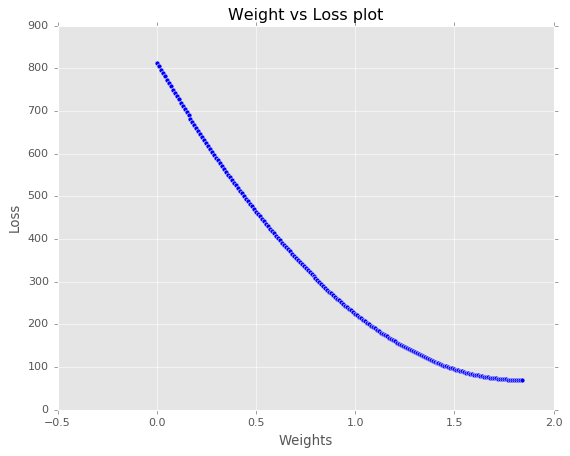

In [53]:
wt = train(X,y,lr=0.01)
print(f"The weight obtained from the training phase is: {wt}")

Scatter plot with the fitted line having slope(weight)=1.8400000000000014


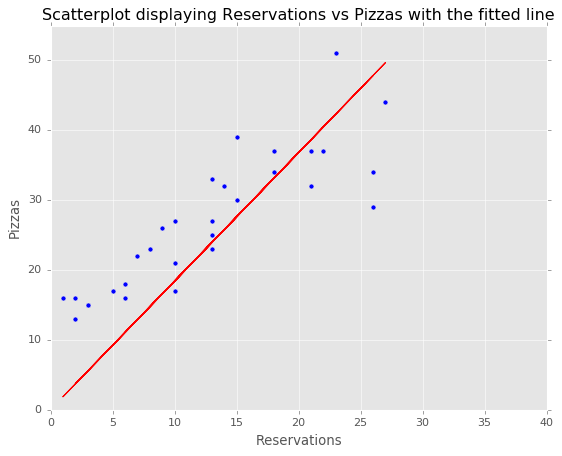

In [60]:
print(f"Scatter plot with the fitted line having slope(weight)={wt}")
plt.scatter(X,y)
plt.axis([0, 40, 0, 55])
plt.plot(X, predict(X, 1.840), linewidth=1.0, color="red")
plt.xlabel("Reservations")
plt.ylabel("Pizzas")
plt.title("Scatterplot displaying Reservations vs Pizzas with the fitted line")
plt.show()

### Calculating slope and itercept (i.e. weight and bias)

In [67]:
def predict_v2(X,w,b):
    return ((X*w)+b)

def loss_v2(X,y,w,b):
    pred_val = (y - predict_v2(X,w,b))**2
    return np.average(pred_val)

In [68]:
def train_v2(X,y,iteration = 10000, lr = 0.01):
    w = 0
    b = 0
    lst_wt = []
    lst_loss = []
    
    for cnt in range(iteration):
        cur_loss = loss_v2(X,y,w,b)
        lst_wt.append(w)
        lst_loss.append(cur_loss)
        
        if loss_v2(X,y,w+lr,b) < cur_loss:
            w +=lr
        elif loss_v2(X,y,w-lr,b) < cur_loss:    
            w -=lr
        elif loss_v2(X,y,w,b+lr) < cur_loss:    
            b +=lr
        elif loss_v2(X,y,w,b-lr) < cur_loss:  
            b -=lr
        else:
            plt.title("Weight vs Loss plot - V2")
            plt.scatter(lst_wt,lst_loss)
            plt.xlabel("Weights")
            plt.ylabel("Loss")
            return w,b       


Weight: 1.1000000000000008 and bias: 12.929999999999769 has been obtained from the training phase 


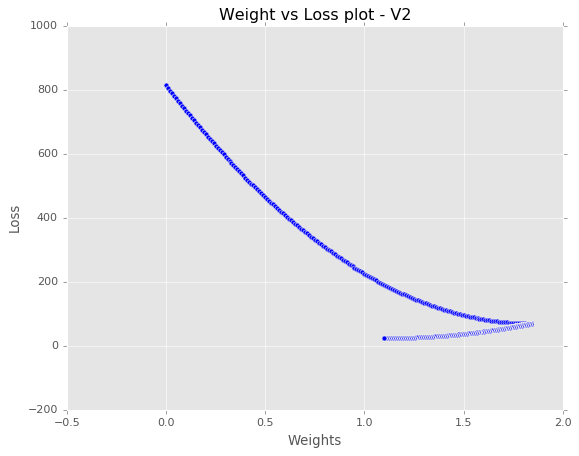

In [69]:
wt_2,b = train_v2(X,y,lr=0.01)
print(f"Weight: {wt_2} and bias: {b} has been obtained from the training phase ")

Scatter plot with the fitted line having slope(weight)=1.1000000000000008 and intercept(bias)=12.929999999999769


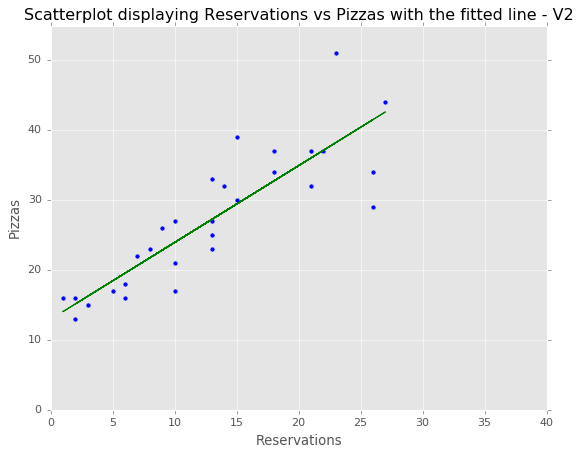

In [72]:
print(f"Scatter plot with the fitted line having slope(weight)={wt_2} and intercept(bias)={b}")
plt.scatter(X,y)
plt.axis([0, 40, 0, 55])
plt.plot(X, predict_v2(X,wt_2,b), linewidth=1.0, color="green")
plt.xlabel("Reservations")
plt.ylabel("Pizzas")
plt.title("Scatterplot displaying Reservations vs Pizzas with the fitted line - V2")
plt.show()